In [12]:
# Essential Libraries for Data Analysis and Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ignore warnings for a clean output
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load your CSV file (make sure the file is in the same folder)
data = pd.read_csv("fraudTest.csv")
print("Data Shape:", data.shape)
data.head(5)

Data Shape: (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
# Checking for any missing values
print("Missing values per column:\n", data.isnull().sum())

# Overview of data types and structure
data.info()

Missing values per column:
 Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num    

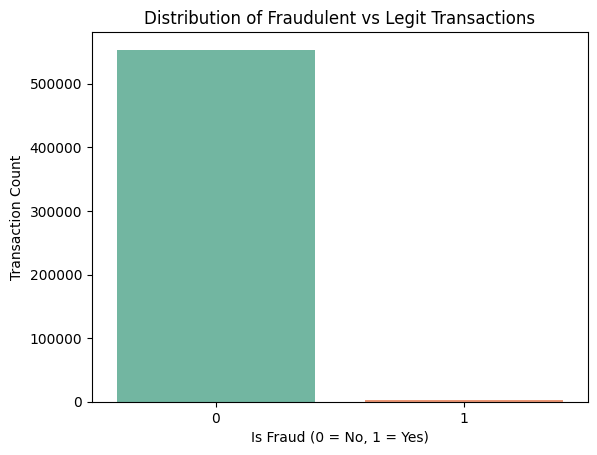

In [5]:
# Plotting class distribution to check imbalance
sns.countplot(data=data, x="is_fraud", palette="Set2")
plt.title("Distribution of Fraudulent vs Legit Transactions")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Count")
plt.show()

In [6]:
# Dropping irrelevant or high-cardinality columns
drop_cols = ['Unnamed: 0', 'cc_num', 'trans_num', 'first', 'last', 'street', 'job',
             'merchant', 'state', 'city', 'zip', 'dob', 'trans_date_trans_time', 
             'unix_time', 'merch_lat', 'merch_long']
data.drop(columns=drop_cols, inplace=True, errors='ignore')

# One-hot encoding categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)
print("Encoded Data Shape:", data_encoded.shape)

Encoded Data Shape: (555719, 19)


In [7]:
# Splitting features and target
X = data_encoded.drop("is_fraud", axis=1)
y = data_encoded["is_fraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# Scaling for better model performance
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
logi_model = LogisticRegression()
logi_model.fit(X_train_scaled, y_train)
logi_preds = logi_model.predict(X_test_scaled)

print("📊 Logistic Regression Results")
print(classification_report(y_test, logi_preds))

📊 Logistic Regression Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138394
           1       0.00      0.00      0.00       536

    accuracy                           1.00    138930
   macro avg       0.50      0.50      0.50    138930
weighted avg       0.99      1.00      0.99    138930



In [9]:
forest_model = RandomForestClassifier(n_estimators=120, random_state=42, max_depth=12)
forest_model.fit(X_train_scaled, y_train)
forest_preds = forest_model.predict(X_test_scaled)

print("🌲 Random Forest Classifier Results")
print(classification_report(y_test, forest_preds))

🌲 Random Forest Classifier Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138394
           1       0.84      0.55      0.66       536

    accuracy                           1.00    138930
   macro avg       0.92      0.77      0.83    138930
weighted avg       1.00      1.00      1.00    138930



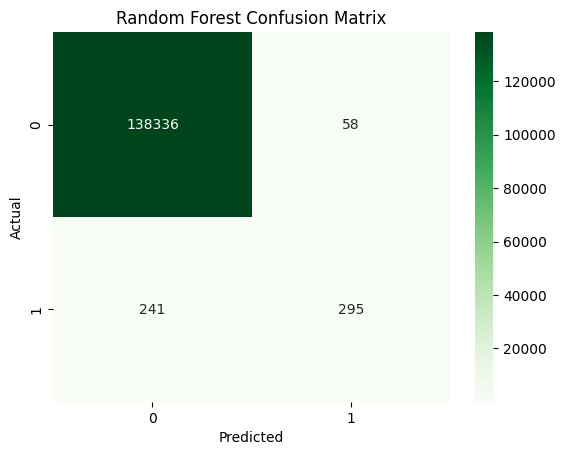

In [10]:
cm = confusion_matrix(y_test, forest_preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [13]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logi_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, forest_preds))

Logistic Regression Accuracy: 0.9961419419851724
Random Forest Accuracy: 0.997847837040236


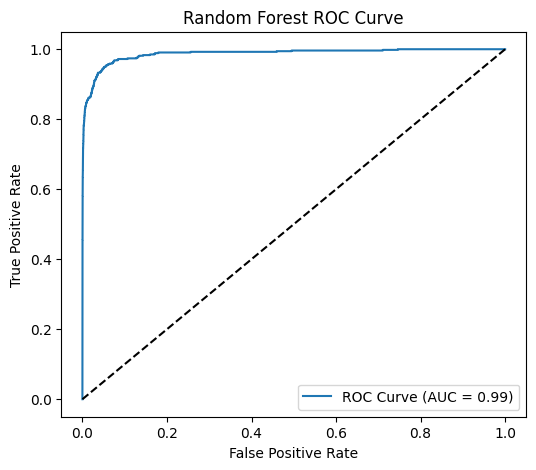

In [14]:
from sklearn.metrics import roc_curve, auc

# Random Forest ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, forest_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [15]:
import joblib

# Save model and scaler
joblib.dump(forest_model, 'rf_fraud_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']